## Linear Models for Classification

Linear models are also extensively used for classification. Let’s look at binary classification first. In this case, a prediction is made using the following formula:

$y(estimate) = w[0]*x[0] + w[1]*x[2] + ... + w[p]*x[p] > 0$

The formula looks very similar to the one for linear regression, but instead of just returning the weighted sum of the features, we threshold the predicted value at zero. If the function is smaller than zero, we predict the class –1; if it is larger than zero, we predict the class +1.

For linear models for regression, the output, $y(estimate)$, is a linear function of the features: a line, plane, or hyperplane (in higher dimensions). For linear models for classification,
the **decision boundary** is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.

The two most common linear classification algorithms are logistic regression, implemented in *linear_model.LogisticRegression* , and linear support vector machines (linear SVMs), implemented in *svm.LinearSVC* (SVC stands for support vector classifier). Despite its name, LogisticRegression is a classification algorithm and not a
regression algorithm.

In [2]:
import pandas as pd
import mglearn
import matplotlib 
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [4]:
X, y = mglearn.datasets.make_forge()

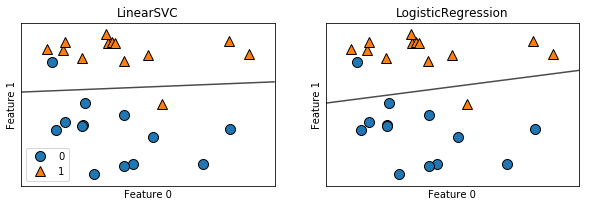

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                  ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

*Figures above show Decision boundaries of a linear SVM and logistic regression on the forge dataset with the default parameters*

In the above figures, the **decision boundaries** found by *LinearSVC* and *LogisticRegression* are plotted as straight lines Seperating the area between class 1 and 0.  

There is also a trade-off parameter that determines the strength of the regularization called *C*. The higher the value of C the lesser the generalization is. 

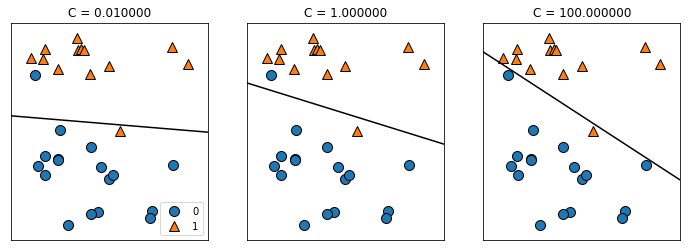

In [8]:
mglearn.plots.plot_linear_svc_regularization()

*Figures above show decision boundaries of a linear SVM on the forge dataset for different values of C.* 

#### *LinearLogistic* in more details

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
         cancer.target, stratify=cancer.target, random_state=43)

logreg=LogisticRegression().fit(X_train, y_train)
print('Training set score is: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Test set score is: {:.2f}'.format(logreg.score(X_test, y_test)))

Training set score is: 0.96
Test set score is: 0.94


Here the default value of C=1 which provides quite good performance. As training and test set performance are very close, it is likely that we are underfitting. Let's try to increase the value of C. 

In [11]:
logreg_100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score is: {:.2f}'.format(logreg_100.score(X_train, y_train)))
print('Test set score is: {:.2f}'.format(logreg_100.score(X_test, y_test)))

Training set score is: 0.98
Test set score is: 0.97


Using C=100 results in higher training and test sets accuracy. Let's also try with lower C values, C=0.01

In [12]:
logreg_001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score is: {:.2f}'.format(logreg_001.score(X_train, y_train)))
print('Test set score is: {:.2f}'.format(logreg_001.score(X_test, y_test)))

Training set score is: 0.93
Test set score is: 0.92


Let's also look at the coefficients

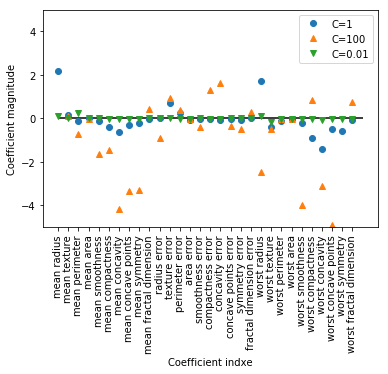

In [21]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg_100.coef_.T, '^', label='C=100')
plt.plot(logreg_001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Coefficient indxe')
plt.ylabel('Coefficient magnitude')
plt.legend()

*Figure above shows coefficients learned by logistic regression on the Breast Cancer dataset for different values of C*